## EDA

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com 
### Date: Oct.20th, 2023

###

### Table of Contents
- [Data Import](#Data-Import)
- [Distributions and Graphs](#Distributions-and-Graphs)
- [Dig in Data](#Dig-in-data)
- [Correlation](#Correlation)

###

### Data Import

In [146]:
import numpy as np
import pandas as pd

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.api import tsa
import statsmodels.api as sm

In [147]:
import pyarrow.parquet as pq

# Read Parquet file into a Pandas DataFrame
df = pq.read_table('IowaClean').to_pandas()

# Now, df contains the data from the Parquet file
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,capitalized_county
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,BUENA VIST,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26,Adair
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,DUBUQUE,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79,Adair
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,HARDIN,1031100.0,American Vodkas,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77,Adams
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,HARDIN,1031100.0,American Vodkas,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37,Adams
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,POLK,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39,Allamakee


In [84]:
#run this code to see all columns
pd.set_option('display.max_columns', None)

In [85]:
df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,capitalized_county
0,INV-33179700135,2021-01-04,2576,Hy-Vee Wine and Spirits / Storm Lake,1250 N Lake St,Storm Lake,50588.0,11.0,BUENA VIST,1081600.0,Whiskey Liqueur,421.0,SAZERAC COMPANY INC,64870,Fireball Cinnamon Whiskey,48,100,0.90,1.35,48,64.80,4.8,1.26,Adair
1,INV-33196200106,2021-01-04,2649,Hy-Vee #3 / Dubuque,400 Locust St,Dubuque,52001.0,31.0,DUBUQUE,1081200.0,Cream Liqueurs,300.0,McCormick Distilling Co.,65200,Tequila Rose Liqueur,12,750,11.50,17.25,4,69.00,3.0,0.79,Adair
2,INV-33184300011,2021-01-04,2539,Hy-Vee Food Store / Iowa Falls,640 S. Oak,Iowa Falls,50126.0,42.0,HARDIN,1031100.0,American Vodkas,260.0,DIAGEO AMERICAS,38008,Smirnoff 80prf PET,6,1750,14.75,22.13,6,132.78,10.5,2.77,Adams
3,INV-33184100015,2021-01-04,4024,Wal-Mart 1546 / Iowa Falls,840 S Oak,Iowa Falls,50126.0,42.0,HARDIN,1031100.0,American Vodkas,55.0,SAZERAC NORTH AMERICA,36648,Caliber Vodka,12,750,3.31,4.97,12,59.64,9.0,2.37,Adams
4,INV-33174200025,2021-01-04,5385,Vine Food & Liquor,2704 Vine St.,West Des Moines,50265.0,77.0,POLK,1012200.0,Scotch Whiskies,260.0,DIAGEO AMERICAS,4626,Buchanan Deluxe 12YR,12,750,20.99,31.49,2,62.98,1.5,0.39,Allamakee


In [86]:
#Now our clean dataset has 2805303 rows and 24 columns
df.shape

(2805303, 24)

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2805303 entries, 0 to 2805306
Data columns (total 24 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   invoice_and_item_number  object 
 1   date                     object 
 2   store_number             int64  
 3   store_name               object 
 4   address                  object 
 5   city                     object 
 6   zip_code                 float64
 7   county_number            float64
 8   county                   object 
 9   category                 float64
 10  category_name            object 
 11  vendor_number            float64
 12  vendor_name              object 
 13  item_number              int64  
 14  item_description         object 
 15  pack                     int64  
 16  bottle_volume_ml         int64  
 17  state_bottle_cost        float64
 18  state_bottle_retail      float64
 19  bottles_sold             int64  
 20  sale_dollars             float64
 21  volume_s

In [88]:
df.describe()

,store_number,zip_code,county_number,category,vendor_number,item_number,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons
count,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06,2.805303e+06
mean,4.137796e+03,5.124372e+04,5.712634e+01,1.055993e+06,2.871833e+02,5.456070e+04,1.194263e+01,8.218059e+02,1.132498e+01,1.698818e+01,1.185837e+01,1.624491e+02,9.383131e+00,2.473141e+00
std,1.265248e+03,9.906393e+02,2.732932e+01,1.039322e+05,1.415585e+02,9.184738e+04,7.846288e+00,5.254817e+02,1.103230e+01,1.654621e+01,3.566819e+01,5.871845e+02,4.120730e+01,1.088602e+01
min,2.106000e+03,5.000200e+04,1.000000e+00,1.011000e+06,3.300000e+01,2.580000e+02,1.000000e+00,2.000000e+01,6.600000e-01,9.900000e-01,1.000000e+00,1.340000e+00,2.000000e-02,0.000000e+00
25%,2.644000e+03,5.031400e+04,3.100000e+01,1.012100e+06,2.050000e+02,2.712500e+04,6.000000e+00,3.750000e+02,6.000000e+00,9.000000e+00,3.000000e+00,4.200000e+01,1.500000e+00,3.900000e-01
50%,4.186000e+03,5.104000e+04,6.200000e+01,1.031200e+06,2.600000e+02,3.991600e+04,1.200000e+01,7.500000e+02,8.990000e+00,1.349000e+01,6.000000e+00,8.892000e+01,4.500000e+00,1.180000e+00
75%,5.244000e+03,5.230200e+04,7.700000e+01,1.062500e+06,4.200000e+02,6.525100e+04,1.200000e+01,1.000000e+03,1.400000e+01,2.100000e+01,1.200000e+01,1.665000e+02,1.050000e+01,2.770000e+00
max,9.049000e+03,5.722200e+04,9.900000e+01,1.901200e+06,9.780000e+02,9.999950e+05,1.200000e+02,5.250000e+03,2.098940e+03,3.148410e+03,1.320000e+04,2.509320e+05,1.320000e+04,3.487070e+03


In [89]:
df.nunique()

invoice_and_item_number    2805303
date                           326
store_number                  1954
store_name                    1952
address                       1936
city                           442
zip_code                       479
county_number                   99
county                         119
category                        57
category_name                   57
vendor_number                  222
vendor_name                    227
item_number                   4543
item_description              4029
pack                            21
bottle_volume_ml                25
state_bottle_cost             1312
state_bottle_retail           1315
bottles_sold                   397
sale_dollars                 11136
volume_sold_liters             772
volume_sold_gallons            761
capitalized_county              99
dtype: int64

### 

To expedite code execution without introducing bias, we recommend obtaining a random sample (50K) from 'df4'. This approach ensures efficiency while maintaining the integrity of the dataset.

In [148]:
subset_df = df.sample(n=50000, random_state=42)

In [91]:
subset_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,capitalized_county
1418617,INV-36026900017,2021-04-22,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,7.0,BLACK HAWK,1081400.0,American Schnapps,55.0,SAZERAC NORTH AMERICA,81124,99 Peppermint Mini,10,50,5.16,7.74,2,15.48,0.1,0.02,Carroll
2429270,INV-40933700033,2021-10-13,4073,"Uptown Liquor, Llc",306 Hwy 69 South,Forest City,50436.0,95.0,WINNEBAGO,1031200.0,American Flavored Vodka,380.0,Phillips Beverage,41692,UV Blue Raspberry,6,1750,11.50,17.25,6,103.50,10.5,2.77,Mills
125406,INV-42098600015,2021-11-17,2685,Hy-Vee -Garner,255 West US HWY 18,Garner,50438.0,41.0,HANCOCK,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10628,Canadian Club Whisky,6,1750,14.50,21.75,6,130.50,10.5,2.77,Madison
2252749,INV-36544600001,2021-05-12,5202,Casey's General Store #2900 / Gilber,"115, 25th Ave",Gilbertville,50634.0,7.0,BLACK HAWK,1071100.0,Cocktails /RTD,308.0,Mango Bottling,71529,Tooters Ala Bama Slama,12,375,6.00,9.00,4,36.00,1.5,0.39,Carroll
695510,INV-42759700022,2021-12-09,3757,Wal-Mart 3590 / Sioux City,3101 Floyd Blvd,Sioux City,51108.0,97.0,WOODBURY,1081400.0,American Schnapps,421.0,SAZERAC COMPANY INC,84207,99 Root Beer Mini,10,50,5.16,7.74,10,77.40,0.5,0.13,Guthrie


###

### Distributions and Graphs

#### Distribution of Categorical Variables

In [150]:
# Convert the 'date' column to datetime
subset_df['date'] = pd.to_datetime(subset_df['date'])

# Extract day and month into new columns
subset_df['day'] = subset_df['date'].dt.day
subset_df['month'] = subset_df['date'].dt.month

subset_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,capitalized_county,day,month
1418617,INV-36026900017,2021-04-22,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,7.0,BLACK HAWK,1081400.0,American Schnapps,55.0,SAZERAC NORTH AMERICA,81124,99 Peppermint Mini,10,50,5.16,7.74,2,15.48,0.1,0.02,Carroll,22,4
2429270,INV-40933700033,2021-10-13,4073,"Uptown Liquor, Llc",306 Hwy 69 South,Forest City,50436.0,95.0,WINNEBAGO,1031200.0,American Flavored Vodka,380.0,Phillips Beverage,41692,UV Blue Raspberry,6,1750,11.50,17.25,6,103.50,10.5,2.77,Mills,13,10
125406,INV-42098600015,2021-11-17,2685,Hy-Vee -Garner,255 West US HWY 18,Garner,50438.0,41.0,HANCOCK,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10628,Canadian Club Whisky,6,1750,14.50,21.75,6,130.50,10.5,2.77,Madison,17,11
2252749,INV-36544600001,2021-05-12,5202,Casey's General Store #2900 / Gilber,"115, 25th Ave",Gilbertville,50634.0,7.0,BLACK HAWK,1071100.0,Cocktails /RTD,308.0,Mango Bottling,71529,Tooters Ala Bama Slama,12,375,6.00,9.00,4,36.00,1.5,0.39,Carroll,12,5
695510,INV-42759700022,2021-12-09,3757,Wal-Mart 3590 / Sioux City,3101 Floyd Blvd,Sioux City,51108.0,97.0,WOODBURY,1081400.0,American Schnapps,421.0,SAZERAC COMPANY INC,84207,99 Root Beer Mini,10,50,5.16,7.74,10,77.40,0.5,0.13,Guthrie,9,12


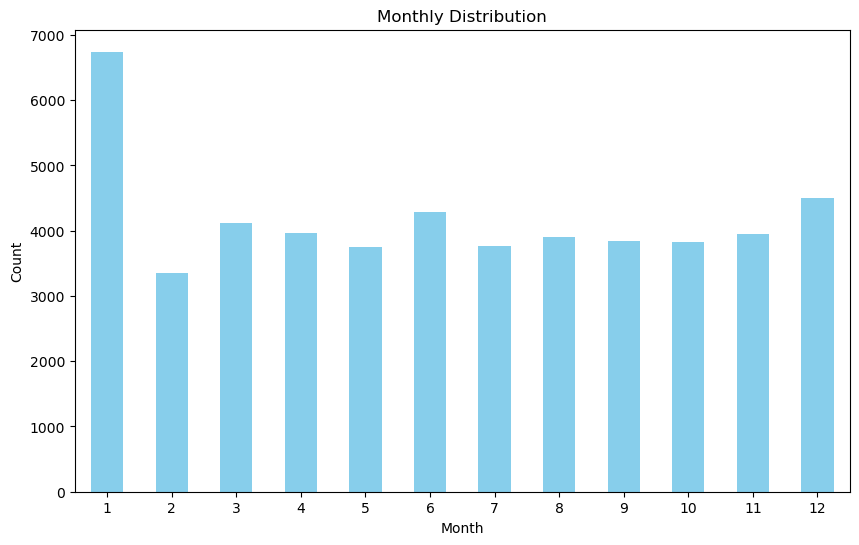

In [151]:
# Monthly distribution
monthly_distribution = subset_df.groupby('month').size()
plt.figure(figsize=(10, 6))
monthly_distribution.plot(kind='bar', color='skyblue')
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Monthly Distribution')
plt.xticks(rotation=0)
plt.show()

The graph reveals notable trends in monthly order frequencies. January emerges as the month with the highest frequency, aligning seamlessly with the dataset's timeframe spanning from January 2021 to January 2022. In contrast, February records the lowest frequency, potentially attributed to its shorter duration of 28 days in the year 2021. These patterns offer valuable insights into the temporal dynamics of alcohol purchases.

###

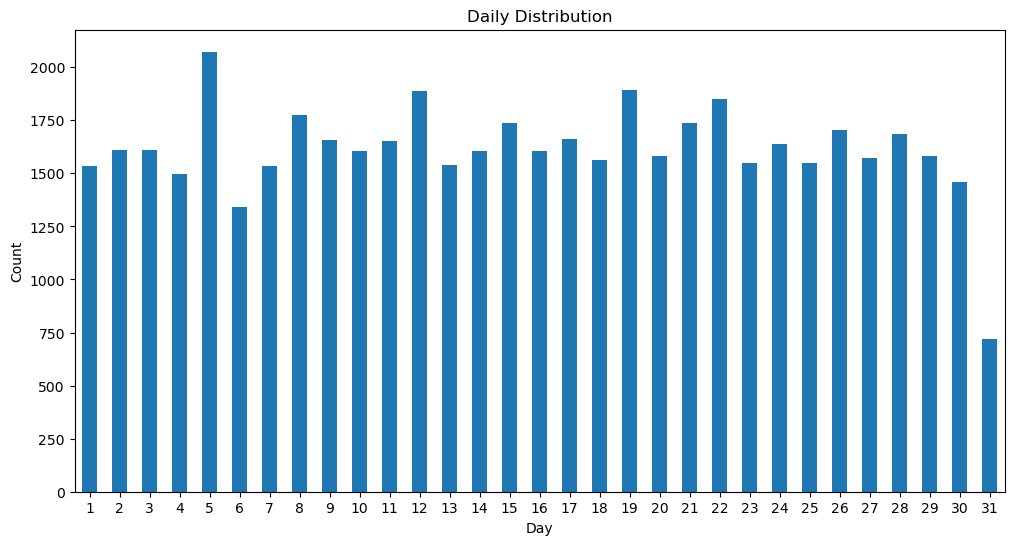

In [153]:
# Daily distribution
daily_distribution = subset_df.groupby('day').size()
plt.figure(figsize=(12, 6))
daily_distribution.plot(kind='bar')
plt.xlabel('Day')
plt.ylabel('Count')
plt.title('Daily Distribution')
plt.xticks(rotation=0)
plt.show()

The graph unveils an intriguing pattern: the 31st of the month exhibits the lowest frequency of orders. This suggests a potential customer behavior trend, indicating a reluctance to purchase alcohol towards the end of the month. Alternatively, it could signify a strategic choice by store owners to limit operations on the 31st, aligning with this observed decrease in sales activity

###

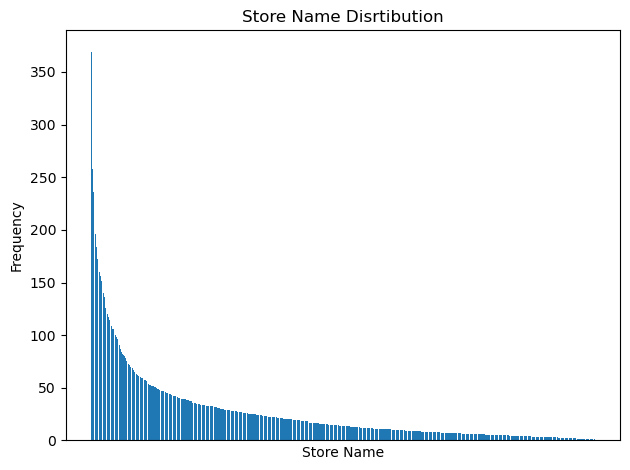

In [94]:
store_name_counts = subset_df['store_name'].value_counts()

plt.figure()
plt.bar(store_name_counts.index, store_name_counts.values)
plt.xlabel('Store Name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Store Name Disrtibution')
plt.tight_layout()
plt.show()

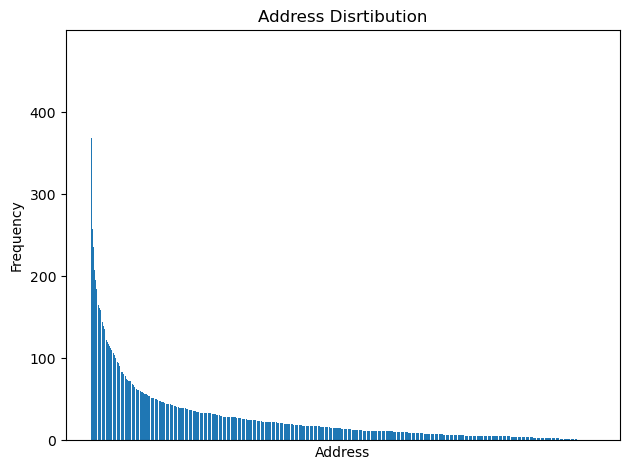

In [95]:
address_counts = subset_df['address'].value_counts()

plt.figure()
plt.bar(address_counts.index, address_counts.values)
plt.xlabel('Address')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Address Disrtibution')
plt.tight_layout()
plt.show()

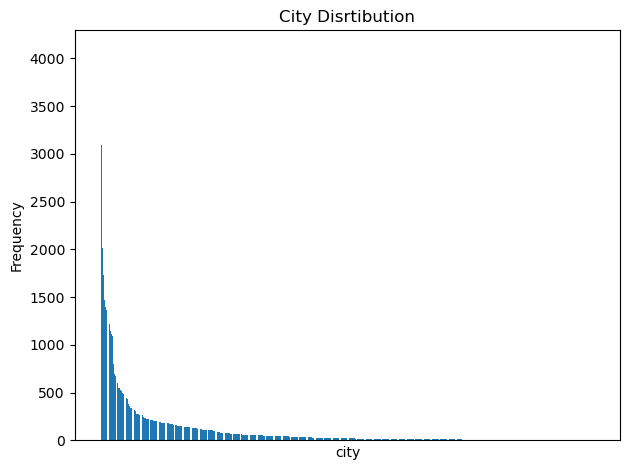

In [96]:
city_counts = subset_df['city'].value_counts()

plt.figure()
plt.bar(city_counts.index, city_counts.values)
plt.xlabel('city')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('City Disrtibution')
plt.tight_layout()
plt.show()

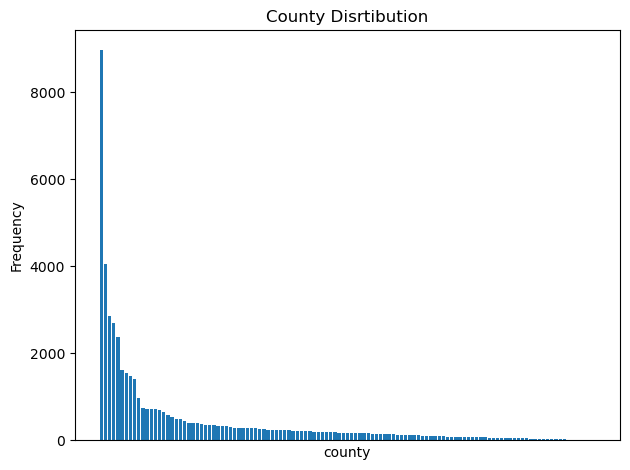

In [97]:
county_counts = subset_df['county'].value_counts()

plt.figure()
plt.bar(county_counts.index, county_counts.values)
plt.xlabel('county')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('County Disrtibution')
plt.tight_layout()
plt.show()

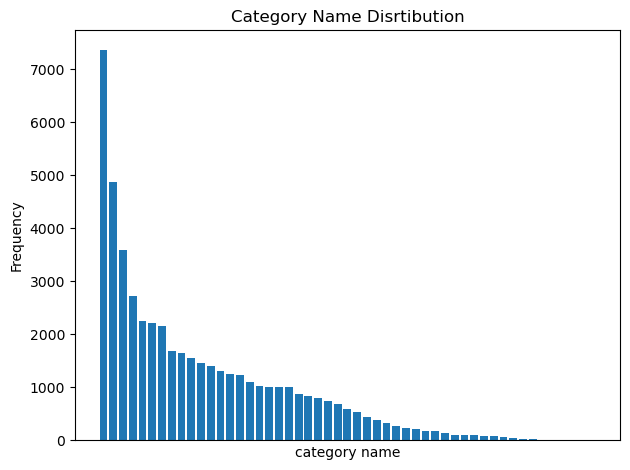

In [98]:
category_name_counts = subset_df['category_name'].value_counts()

plt.figure()
plt.bar(category_name_counts.index, category_name_counts.values)
plt.xlabel('category name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Category Name Disrtibution')
plt.tight_layout()
plt.show()

In [156]:
print(subset_df['category_name'].unique())

['American Schnapps' 'American Flavored Vodka' 'Canadian Whiskies'
 'Cocktails /RTD' 'White Rum' 'American Vodkas' 'Flavored Rum'
 'Imported Brandies' 'Spiced Rum' 'Straight Bourbon Whiskies'
 'Temporary & Specialty Packages' 'Flavored Gin' '100% Agave Tequila'
 'Imported Dry Gins' 'Blended Whiskies' 'American Cordials & Liqueur'
 'Tennessee Whiskies' 'Whiskey Liqueur' 'Triple Sec' 'Coffee Liqueurs'
 'American Brandies' 'Imported Cordials & Liqueurs' 'Imported Vodkas'
 'American Dry Gins' 'Mixto Tequila' 'Cream Liqueurs'
 'Neutral Grain Spirits' 'American Distilled Spirit Specialty'
 'Imported Flavored Vodka' 'Single Malt Scotch' 'Scotch Whiskies'
 'Neutral Grain Spirits Flavored' 'Imported Schnapps' 'Irish Whiskies'
 'Gold Rum' 'Bottled in Bond Bourbon' 'Single Barrel Bourbon Whiskies'
 'Mezcal' 'Straight Rye Whiskies' 'Imported Cordials & Liqueur'
 'Special Order Items' 'Aged Dark Rum' 'Temporary &  Specialty Packages'
 'Imported Distilled Spirit Specialty' 'American Sloe Gins'
 'Cor

We would like to group these alcohol types into more general types by using mapping.

In [169]:
category_mapping = {
    'American Vodkas': 'Vodka',
    'Imported Vodkas': 'Vodka',
    'Flavored Vodka': 'Vodka',
    'White Rum': 'Rum',
    'Gold Rum': 'Rum',
    'Spiced Rum': 'Rum',
    'Straight Bourbon Whiskies': 'Whiskey',
    'Blended Whiskies': 'Whiskey',
    'Single Malt Scotch': 'Whiskey',
    'Scotch Whiskies': 'Whiskey',
    'Tennessee Whiskies': 'Whiskey',
    'Straight Rye Whiskies': 'Whiskey',
    'Bottled in Bond Bourbon': 'Whiskey',
    'Single Barrel Bourbon Whiskies': 'Whiskey',
    'Imported Dry Gins': 'Gin',
    'American Dry Gins': 'Gin',
    'Flavored Gin': 'Gin',
    'American Sloe Gins': 'Gin',
    '100% Agave Tequila': 'Tequila',
    'Mixto Tequila': 'Tequila',
    'American Brandies': 'Brandy',
    'Imported Brandies': 'Brandy',
    'American Cordials & Liqueurs': 'Liqueurs and Cordials',
    'Imported Cordials & Liqueurs': 'Liqueurs and Cordials',
    'Whiskey Liqueur': 'Liqueurs and Cordials',
    'Coffee Liqueurs': 'Liqueurs and Cordials',
    'Cream Liqueurs': 'Liqueurs and Cordials',
    'Triple Sec': 'Liqueurs and Cordials',
    'American Distilled Spirit Specialty': 'Specialty and Distilled Spirits',
    'Imported Distilled Spirit Specialty': 'Specialty and Distilled Spirits',
    'Distilled Spirits Specialty': 'Specialty and Distilled Spirits',
    'Mezcal': 'Other Categories',
    'Temporary & Specialty Packages': 'Other Categories',
    'Special Order Items': 'Other Categories',
    'Neutral Grain Spirits': 'Other Categories',
    'Neutral Grain Spirits Flavored': 'Other Categories',
    'Cocktails / RTD (Ready-to-Drink)': 'Other Categories'
}

# Apply mapping to create a new column 'Alcohol_Type'
subset_df['Alcohol_Type'] = subset_df['category_name'].map(category_mapping).fillna('Other Categories')

In [170]:
#sanity check
subset_df.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category,category_name,vendor_number,vendor_name,item_number,item_description,pack,bottle_volume_ml,state_bottle_cost,state_bottle_retail,bottles_sold,sale_dollars,volume_sold_liters,volume_sold_gallons,capitalized_county,day,month,Alcohol_Type
1418617,INV-36026900017,2021-04-22,2572,Hy-Vee Food Store / Cedar Falls,6301 University,Cedar Falls,50613.0,7.0,BLACK HAWK,1081400.0,American Schnapps,55.0,SAZERAC NORTH AMERICA,81124,99 Peppermint Mini,10,50,5.16,7.74,2,15.48,0.1,0.02,Carroll,22,4,Other Categories
2429270,INV-40933700033,2021-10-13,4073,"Uptown Liquor, Llc",306 Hwy 69 South,Forest City,50436.0,95.0,WINNEBAGO,1031200.0,American Flavored Vodka,380.0,Phillips Beverage,41692,UV Blue Raspberry,6,1750,11.50,17.25,6,103.50,10.5,2.77,Mills,13,10,Other Categories
125406,INV-42098600015,2021-11-17,2685,Hy-Vee -Garner,255 West US HWY 18,Garner,50438.0,41.0,HANCOCK,1012100.0,Canadian Whiskies,65.0,Jim Beam Brands,10628,Canadian Club Whisky,6,1750,14.50,21.75,6,130.50,10.5,2.77,Madison,17,11,Other Categories
2252749,INV-36544600001,2021-05-12,5202,Casey's General Store #2900 / Gilber,"115, 25th Ave",Gilbertville,50634.0,7.0,BLACK HAWK,1071100.0,Cocktails /RTD,308.0,Mango Bottling,71529,Tooters Ala Bama Slama,12,375,6.00,9.00,4,36.00,1.5,0.39,Carroll,12,5,Other Categories
695510,INV-42759700022,2021-12-09,3757,Wal-Mart 3590 / Sioux City,3101 Floyd Blvd,Sioux City,51108.0,97.0,WOODBURY,1081400.0,American Schnapps,421.0,SAZERAC COMPANY INC,84207,99 Root Beer Mini,10,50,5.16,7.74,10,77.40,0.5,0.13,Guthrie,9,12,Other Categories


In [171]:
subset_df['Alcohol_Type'].unique()

array(['Other Categories', 'Rum', 'Vodka', 'Brandy', 'Whiskey', 'Gin',
       'Tequila', 'Liqueurs and Cordials',
       'Specialty and Distilled Spirits'], dtype=object)

In [175]:
# Group by 'Alcohol_Type' and calculate total 'sale_dollars', then sort by 'sale_dollars' in descending order
sorted_grouped_df = subset_df.groupby('Alcohol_Type')['sale_dollars'].sum().reset_index().sort_values(by='sale_dollars', ascending=False)

sorted_grouped_df

,Alcohol_Type,sale_dollars
3,Other Categories,2492573.64
7,Vodka,1677036.11
8,Whiskey,1492678.54
2,Liqueurs and Cordials,870014.45
6,Tequila,653190.79
4,Rum,549897.69
0,Brandy,408074.71
1,Gin,193549.26
5,Specialty and Distilled Spirits,116819.19


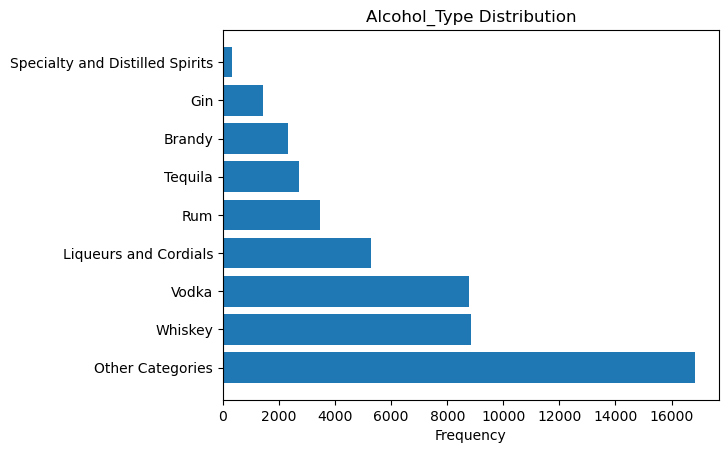

In [178]:
Alcohol_Type_counts = subset_df['Alcohol_Type'].value_counts()

plt.figure()
plt.barh(Alcohol_Type_counts.index, Alcohol_Type_counts.values)  # Use barh for horizontal bar chart
plt.title('Alcohol_Type Distribution')
plt.xlabel('Frequency')  # Adjust xlabel since the chart is transposed
plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.show()

Among the various alcohol categories, whisky appears to be the most popular choice, followed closely by vodka with a slight difference. On the other hand, Specialty and Distilled Spirits seem to be the least popular, possibly due to their lower alcohol content

###

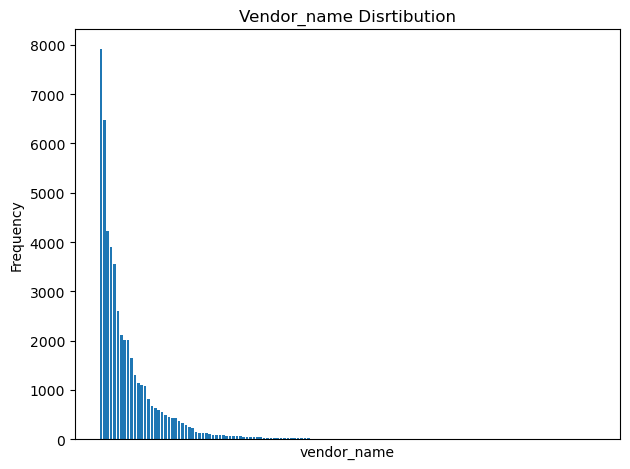

In [99]:
vendor_name_counts = subset_df['vendor_name'].value_counts()

plt.figure()
plt.bar(vendor_name_counts.index, vendor_name_counts.values)
plt.xlabel('vendor_name')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Vendor_name Disrtibution')
plt.tight_layout()
plt.show()

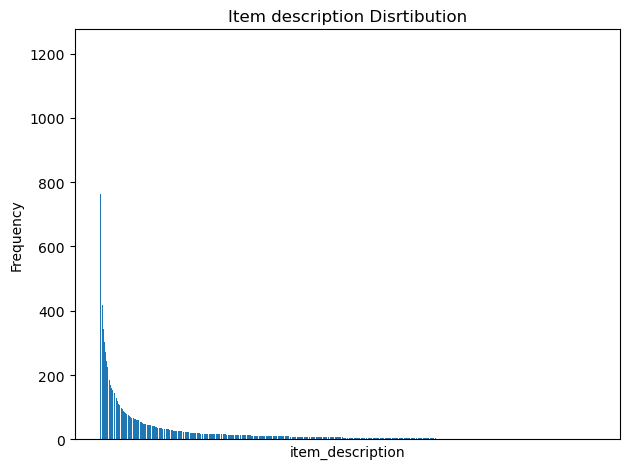

In [100]:
item_description_counts = subset_df['item_description'].value_counts()

plt.figure()
plt.bar(item_description_counts.index, item_description_counts.values)
plt.xlabel('item_description')
plt.ylabel('Frequency')
plt.xticks([])
plt.title('Item description Disrtibution')
plt.tight_layout()
plt.show()

###

#### Distribution of Numerical Variables

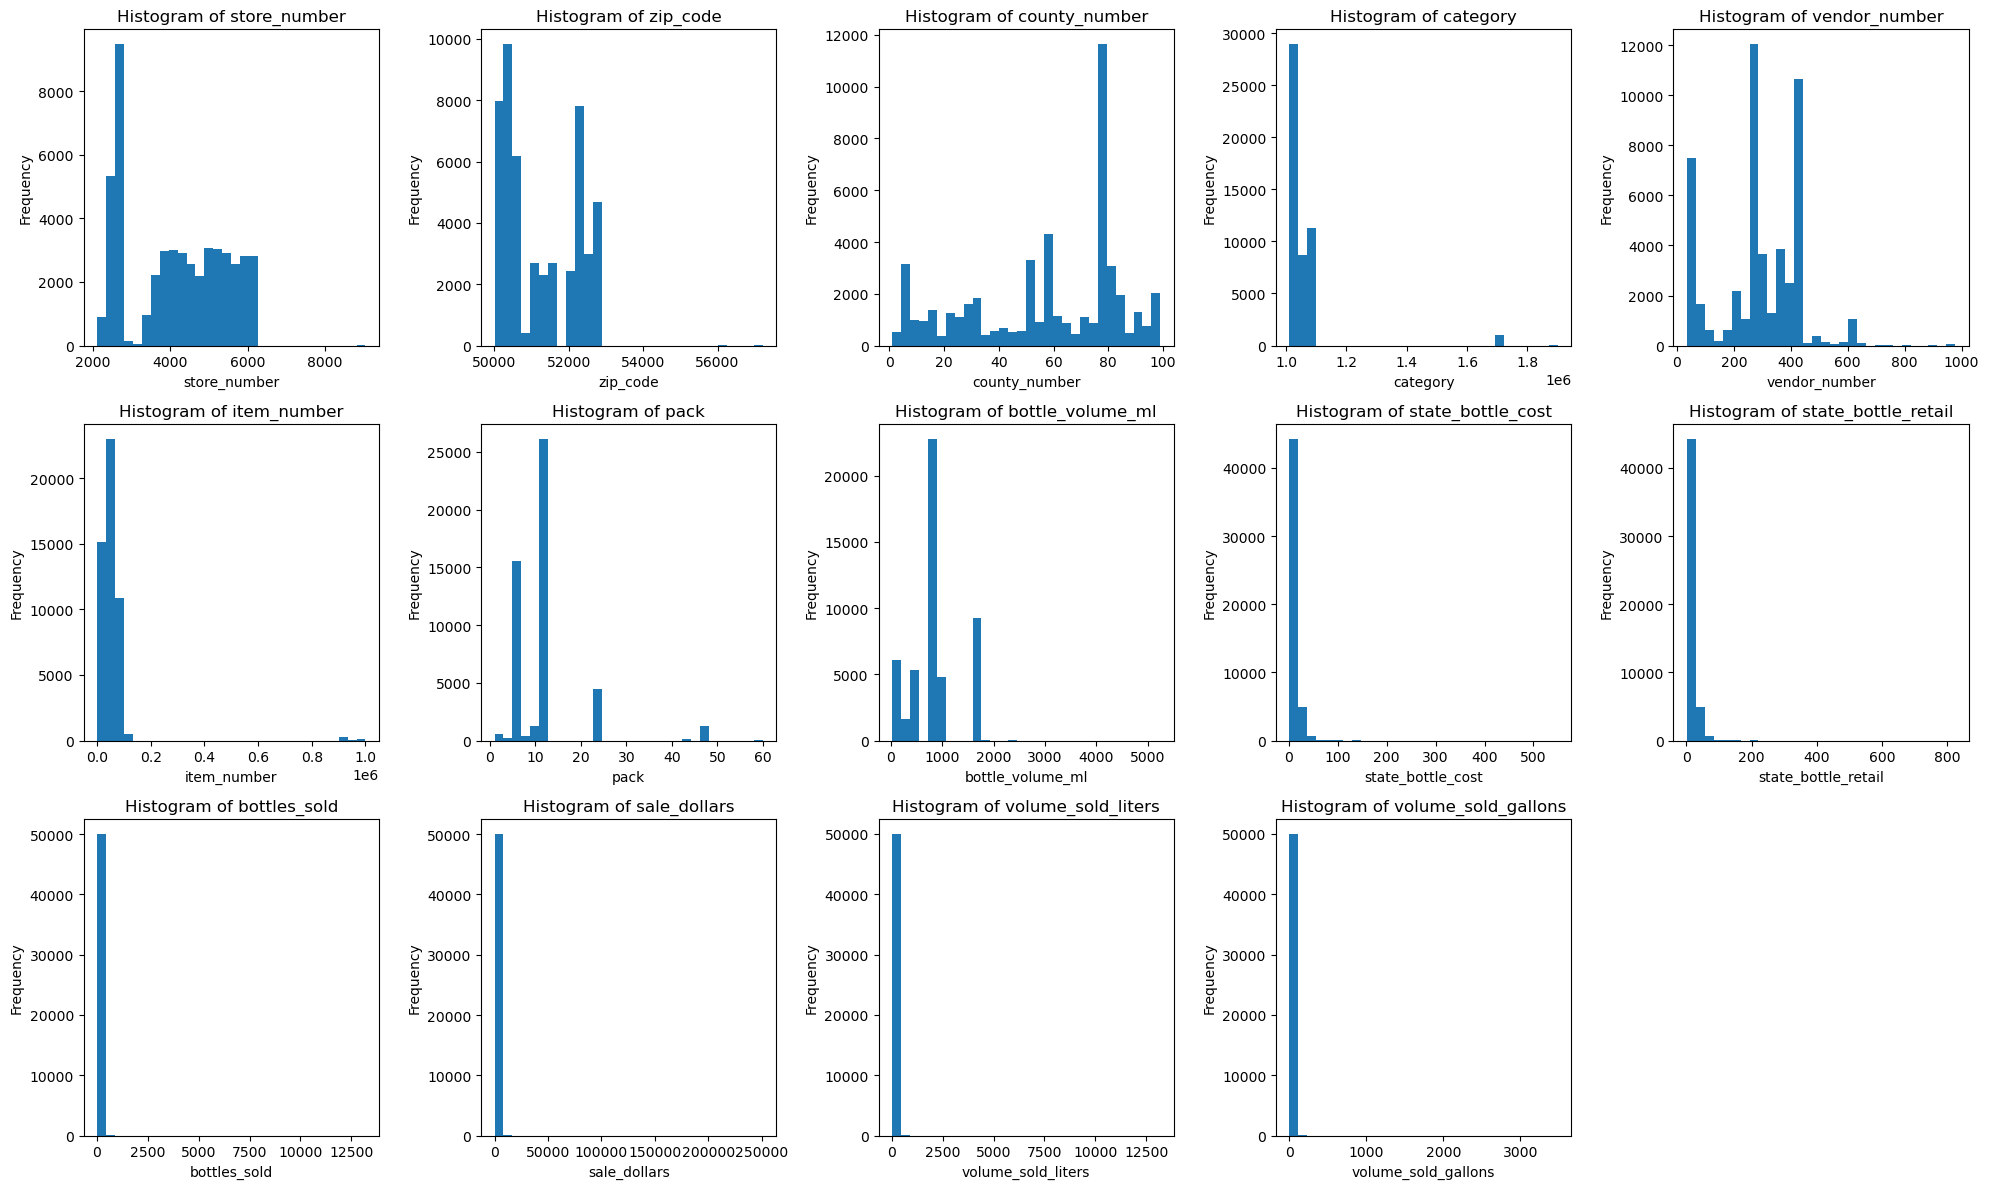

In [101]:
numeric_columns = subset_df.select_dtypes(include=['float64', 'int64']).columns

# Determine the number of rows and columns for subplots
num_cols = 5
num_rows, remainder = divmod(len(numeric_columns), num_cols)
num_rows += int(remainder > 0)  # Add an additional row if there are remaining columns

# Create subplots for numeric columns (3x5 grid)
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(20, 12))

# Plot histograms for numeric columns
for i, column in enumerate(numeric_columns):
    row = i // num_cols
    col = i % num_cols
    axes[row, col].hist(subset_df[column].dropna(), bins=30)
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
    axes[row, col].set_title(f'Histogram of {column}')

# Hide any remaining empty subplots (if any)
for i in range(len(numeric_columns), num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()

The graphs exhibit uneven distribution, displaying pronounced tails that suggest the presence of potential outliers in some cases

###

### Dig in data

#### Category VS Sales

In [102]:
category_sales = subset_df.groupby('category_name')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_categories = category_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 Liquor Categories by Total Sales:")
print(top_10_categories)

Top 10 Liquor Categories by Total Sales:
category_name
American Vodkas              1411242.02
Canadian Whiskies            1022775.41
Straight Bourbon Whiskies     650160.39
Whiskey Liqueur               470971.31
100% Agave Tequila            457961.36
Spiced Rum                    418839.31
Imported Brandies             309371.63
Tennessee Whiskies            281263.07
Imported Vodkas               265794.09
Blended Whiskies              227548.12
Name: sale_dollars, dtype: float64


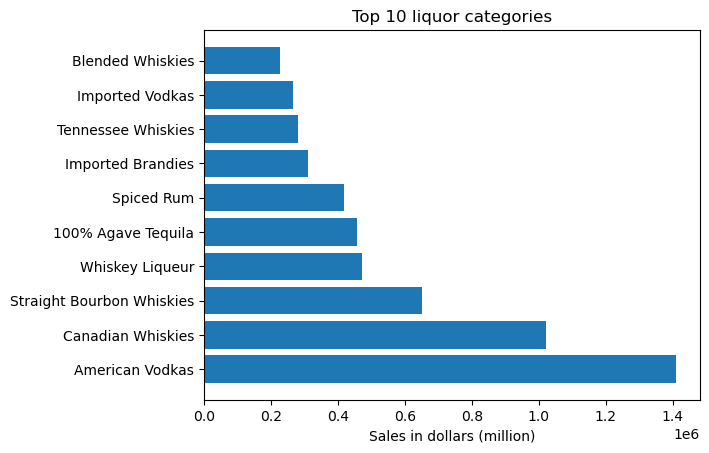

In [131]:
plt.figure()
plt.barh(top_10_categories.index, top_10_categories.values)  # Use barh for horizontal bar chart
plt.title('Top 10 liquor categories')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.show()

### 

We would like to see the descending order.

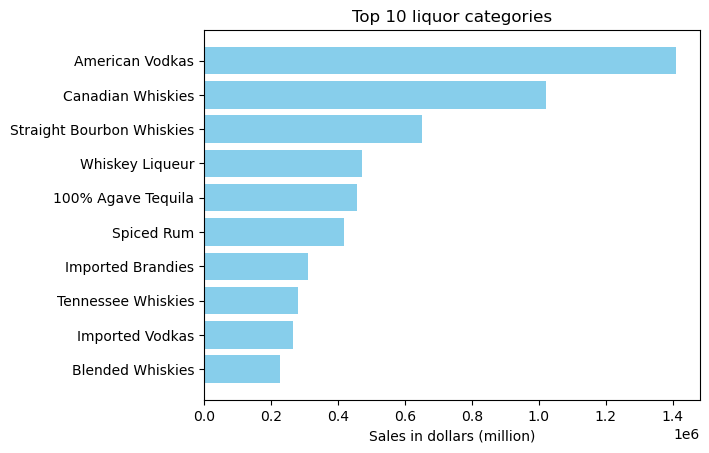

In [137]:
sorted_categories = top_10_categories.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_categories.index[::-1], sorted_categories.values[::-1], color='skyblue') 
plt.title('Top 10 liquor categories')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.show()

###

In [104]:
Bottom_10_categories = category_sales.sort_values(ascending=False).tail(10)

# Print the top 10 categories and their total sales
print("Bottom 10 Liquor Categories by Total Sales:")
print(Bottom_10_categories)

Bottom 10 Liquor Categories by Total Sales:
category_name
Corn Whiskies                           11244.88
Bottled in Bond Bourbon                 10846.66
Flavored Gin                             9791.84
Mezcal                                   8400.55
Distilled Spirits Specialty               910.00
American Vodka                            856.63
Imported Distilled Spirits Specialty      845.46
American Cordials & Liqueurs              470.70
American Sloe Gins                        463.41
American Distilled Spirits Specialty      396.00
Name: sale_dollars, dtype: float64


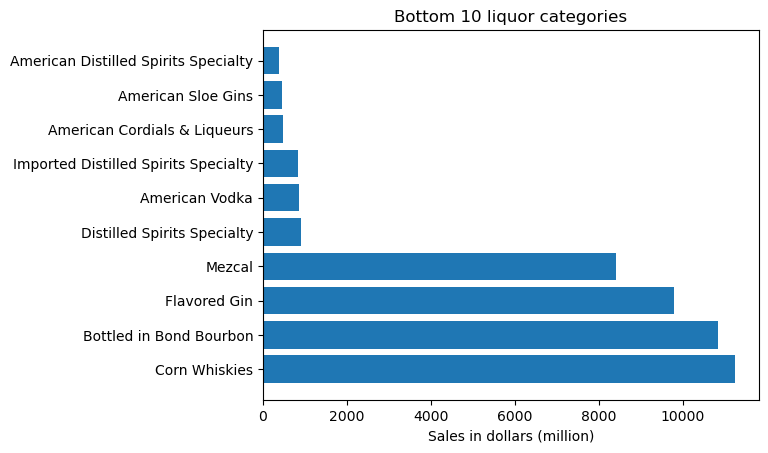

In [132]:
plt.figure()
plt.barh(Bottom_10_categories.index, Bottom_10_categories.values)  # Use barh for horizontal bar chart
plt.title('Bottom 10 liquor categories')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.show()

In [206]:
AlcoholType_sales = subset_df.groupby('Alcohol_Type')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_types = AlcoholType_sales.sort_values(ascending=False).head(10)

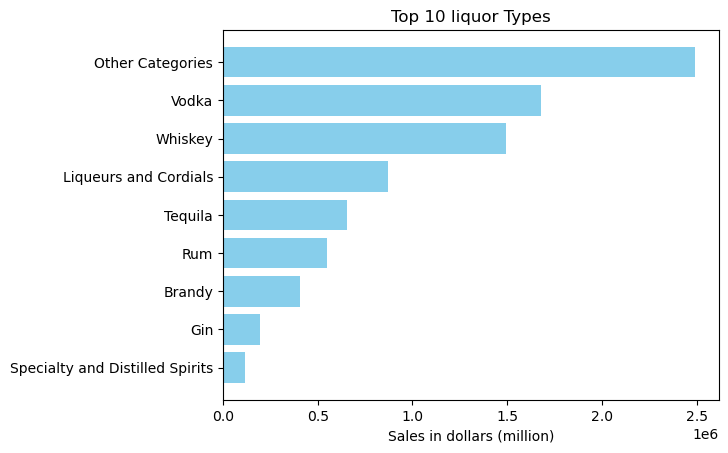

In [208]:
plt.figure()
plt.barh(top_10_types.index[::-1], top_10_types.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Types')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.show()

In [218]:
top_sales_by_type = subset_df.loc[subset_df.groupby('Alcohol_Type')['sale_dollars'].idxmax()]

top_sales_by_type = top_sales_by_type.sort_values(by='sale_dollars')

top_sales_by_type[['category_name','Alcohol_Type', 'sale_dollars']]

,category_name,Alcohol_Type,sale_dollars
592045,Imported Brandies,Brandy,2653.2
1414594,Imported Distilled Spirit Specialty,Specialty and Distilled Spirits,9900.0
2781218,Whiskey Liqueur,Liqueurs and Cordials,11040.0
318978,Imported Dry Gins,Gin,11448.0
154365,Spiced Rum,Rum,12960.0
1385375,Mixto Tequila,Tequila,13254.0
2352689,Straight Bourbon Whiskies,Whiskey,16290.0
2512303,Canadian Whiskies,Other Categories,21470.4
1608319,American Vodkas,Vodka,250932.0


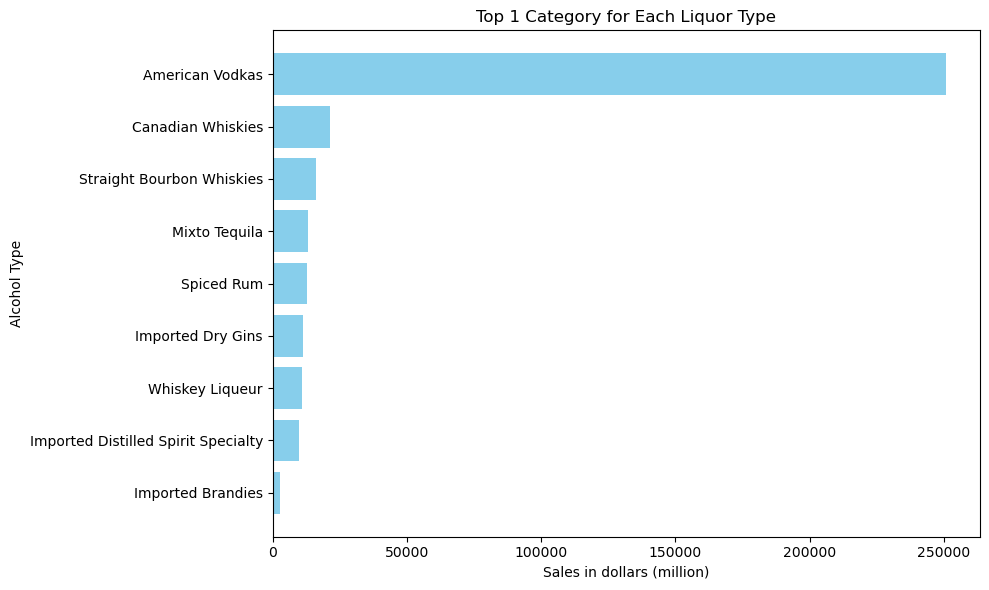

In [222]:
plt.figure(figsize=(10, 6))

# Plotting a horizontal bar chart
plt.barh(top_sales_by_type['category_name'], top_sales_by_type['sale_dollars'], color='skyblue')
plt.xlabel('Sales in dollars (million)')
plt.ylabel('Alcohol Type')
plt.title('Top 1 Category for Each Liquor Type')
plt.tight_layout()
plt.show()

American vodka stands out as the leading choice across all vodka types in terms of sales. We plan to delve into the item descriptions to uncover the specific reasons behind its popularity.

###

#### City VS Sales

In [106]:
city_sales = subset_df.groupby('city')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_CitySales = city_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 City by Total Sales:")
print(top_10_CitySales)

Top 10 City by Total Sales:
city
Des Moines         1232730.88
Cedar Rapids        531423.35
Davenport           410553.72
West Des Moines     387070.17
Sioux City          255270.85
Waterloo            252262.31
Council Bluffs      238912.01
Ames                236339.87
Iowa City           235220.83
Coralville          226070.04
Name: sale_dollars, dtype: float64


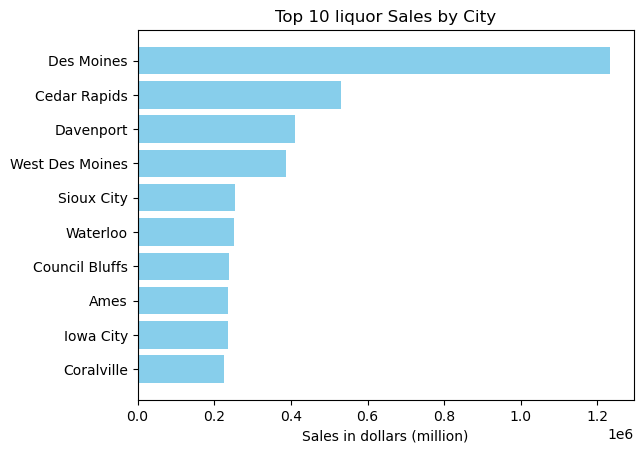

In [143]:
sorted_citysales = top_10_CitySales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_citysales.index[::-1], sorted_citysales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by City')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.show()

###

#### County VS Sales

In [117]:
county_sales = subset_df.groupby('capitalized_county')['sale_dollars'].sum()

# Sort the categories by total sales in descending order and get the top 10
top_10_CountySales = county_sales.sort_values(ascending=False).head(10)

# Print the top 10 categories and their total sales
print("Top 10 County by Total Sales:")
print(top_10_CountySales)

Top 10 County by Total Sales:
capitalized_county
Bremer        2022931.05
Black hawk     718649.32
Boone          587080.05
Guthrie        512543.26
Adair          451638.44
Dallas         377954.71
Allamakee      268386.21
Audubon        267761.29
Cass           253754.57
Henry          176857.89
Name: sale_dollars, dtype: float64


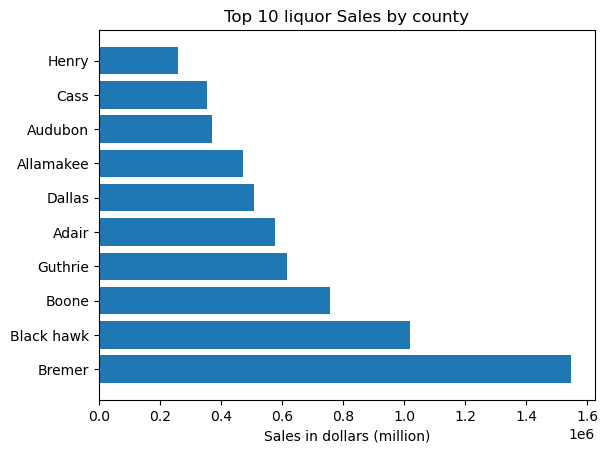

In [134]:
plt.figure()
plt.barh(top_10_CountySales.index, top_10_vendorSales.values)  # Use barh for horizontal bar chart
plt.title('Top 10 liquor Sales by county')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.show()

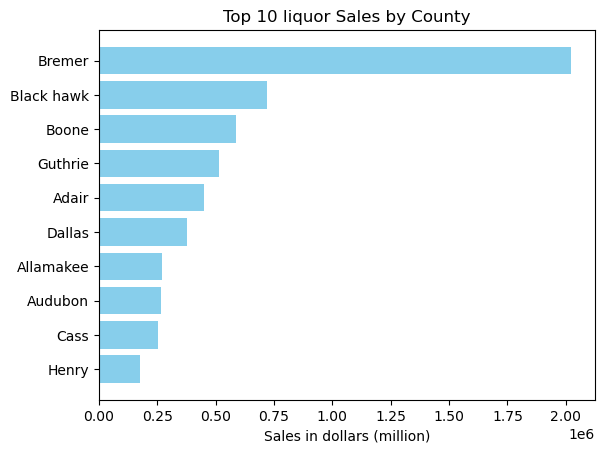

In [140]:
sorted_CountySales = top_10_CountySales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_CountySales.index[::-1], sorted_CountySales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by County')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.show()

###

### Vendor VS Sales

In [120]:
Vendor_sales = subset_df.groupby('vendor_name')['sale_dollars'].sum()

top_10_vendorSales = Vendor_sales.sort_values(ascending=False).head(10)

top_10_vendorSales

vendor_name
DIAGEO AMERICAS         1546809.99
SAZERAC COMPANY  INC    1020476.72
FIFTH GENERATION INC     757243.55
Heaven Hill Brands       614957.38
Jim Beam Brands          578314.64
PERNOD RICARD USA        507670.71
BACARDI USA INC          472117.00
LUXCO INC                369871.61
Brown Forman Corp.       352828.20
PROXIMO                  258325.73
Name: sale_dollars, dtype: float64

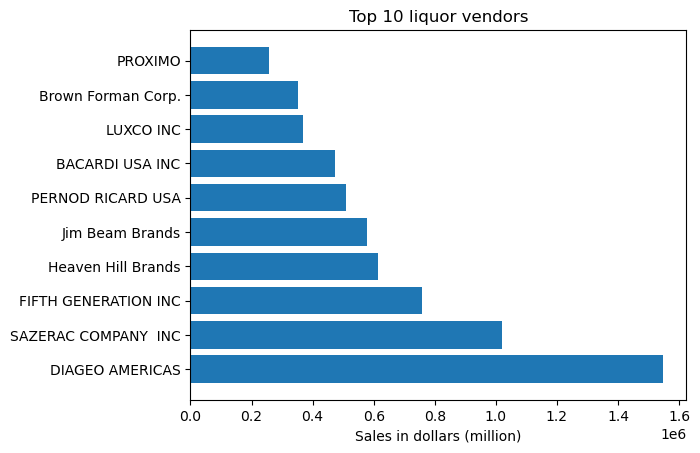

In [133]:
plt.figure()
plt.barh(top_10_vendorSales.index, top_10_vendorSales.values)  # Use barh for horizontal bar chart
plt.title('Top 10 liquor vendors')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.yticks(rotation=0)  # Rotate y-axis labels if needed
plt.show()

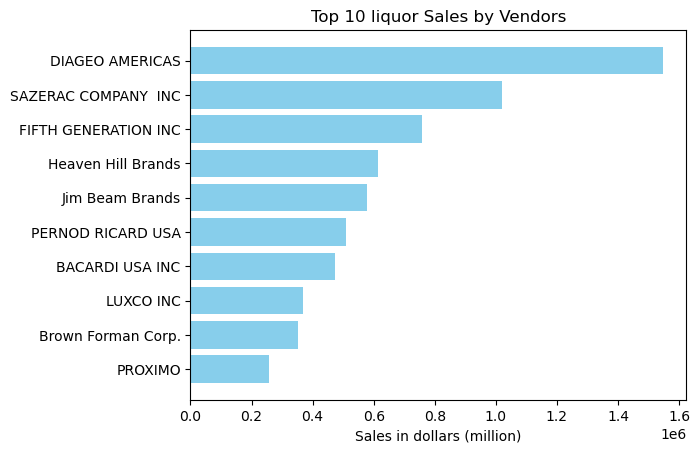

In [141]:
sorted_vendorSales = top_10_vendorSales.sort_values(ascending=False)

plt.figure()
plt.barh(sorted_vendorSales.index[::-1], sorted_vendorSales.values[::-1], color='skyblue') 
plt.title('Top 10 liquor Sales by Vendors')
plt.xlabel('Sales in dollars (million)')  # Adjust xlabel since the chart is transposed
plt.show()

###

In [108]:
#Make a copy of subset just in case
subset1_df=subset_df

###

 ### Correlation

In [122]:
%matplotlib inline

C:\Users\lucia\AppData\Local\Temp\ipykernel_19500\4275629704.py:2: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



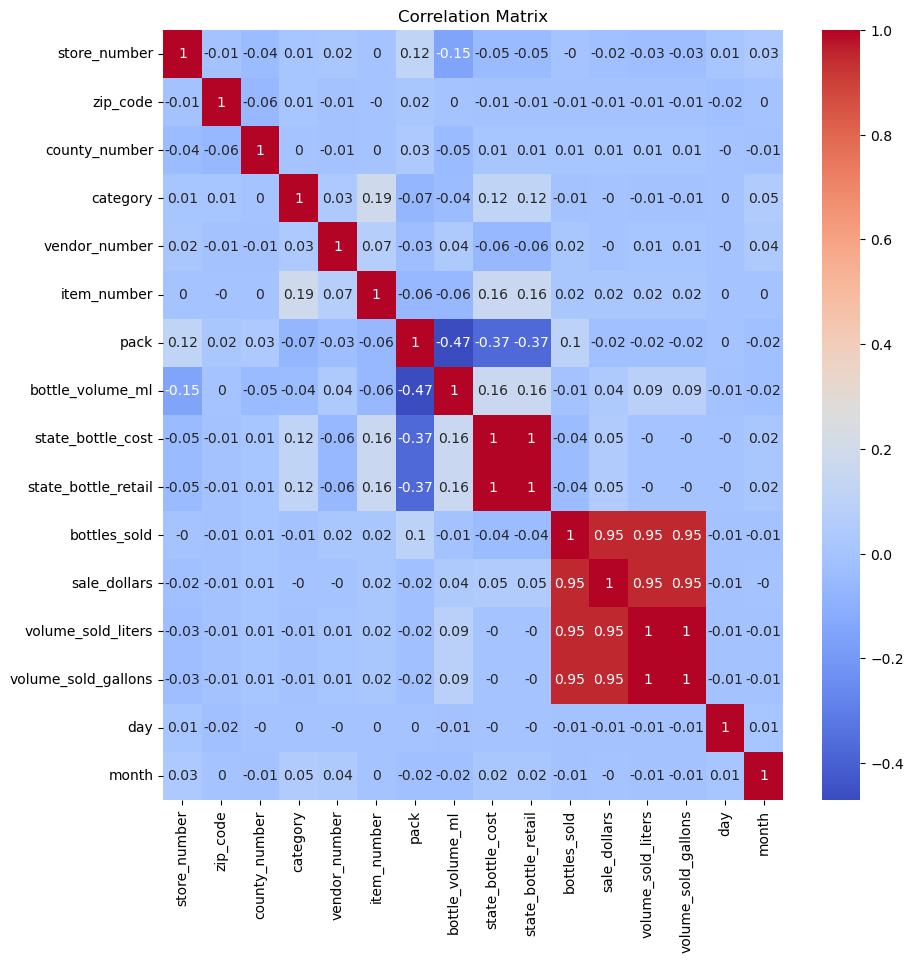

In [229]:
plt.figure(figsize=(10, 10))
corr_matrix = subset_df.corr().round(2)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We need to drop one column for each pair with correlation of 1 to fit our models.  We need to avovid perfect multicollinearity in linear regression models.
Correlation=1 means that this column is perfectly correlated with another column in the dataset. In other words, the two columns provide exactly the same information.
These pairs are: volume_sold_gallons and volume_sold_liters; state_bottle_cost and state_bottle_retail.
We decide to drop gallons because liters are more commonly used in real life.

###

C:\Users\lucia\AppData\Local\Temp\ipykernel_19500\2894533165.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



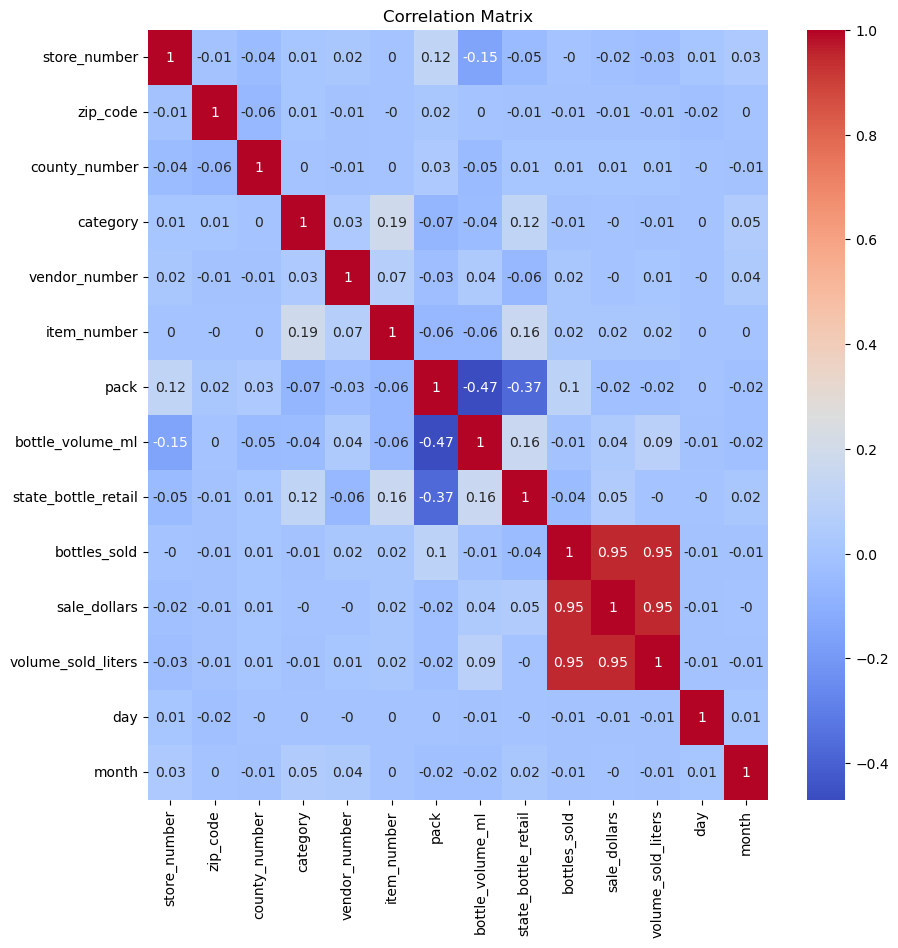

In [230]:
corr_matrix = subset_df.drop(columns=['volume_sold_gallons', 'state_bottle_cost']).corr().round(2)

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

We cannot drop sale_dollars because it is our target variable, thus we have to drop bottles_sold to omit 0.95 correlation.

C:\Users\lucia\AppData\Local\Temp\ipykernel_19500\3187894311.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



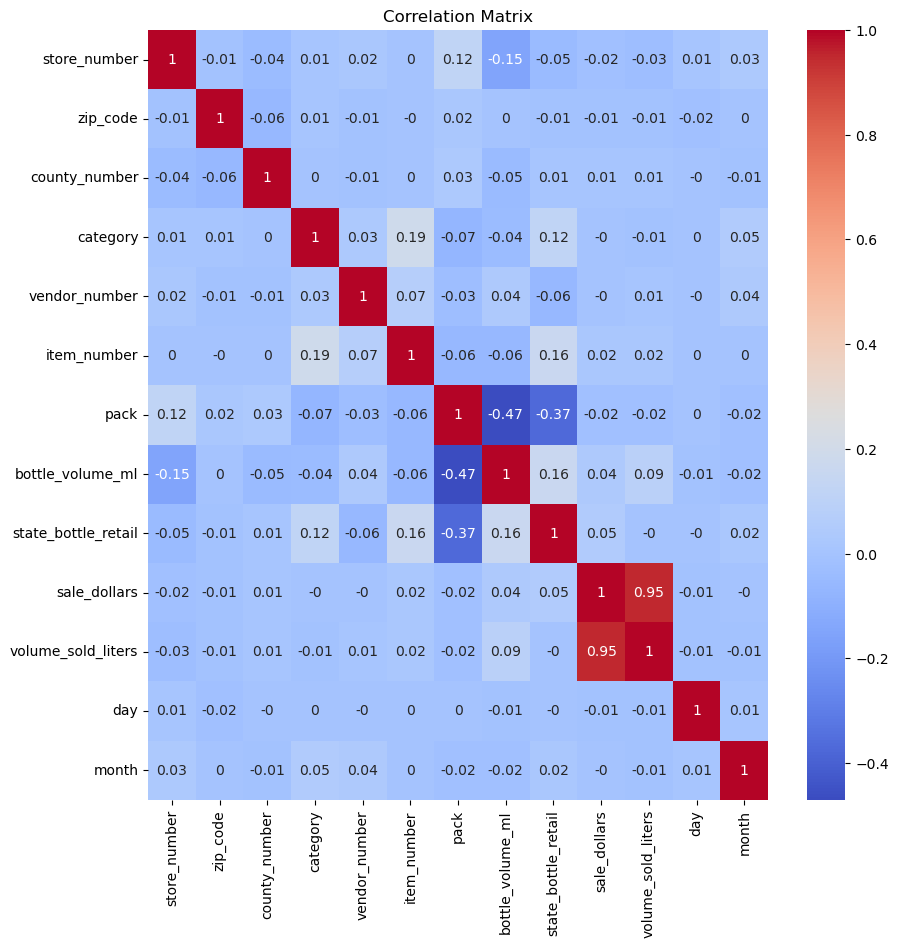

In [231]:
corr_matrix = subset_df.drop(columns=['volume_sold_gallons', 'state_bottle_cost', 'bottles_sold']).corr().round(2)

# Create heatmap
plt.figure(figsize=(10, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [233]:
#check data type
subset_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 1418617 to 1602345
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   invoice_and_item_number  50000 non-null  object        
 1   date                     50000 non-null  datetime64[ns]
 2   store_number             50000 non-null  int64         
 3   store_name               50000 non-null  object        
 4   address                  50000 non-null  object        
 5   city                     50000 non-null  object        
 6   zip_code                 50000 non-null  float64       
 7   county_number            50000 non-null  float64       
 8   county                   50000 non-null  object        
 9   category                 50000 non-null  float64       
 10  category_name            50000 non-null  object        
 11  vendor_number            50000 non-null  float64       
 12  vendor_name             

Since volume_sold_liters still have high correlation with sale, we would change it to categorical column in feature engineering, then create dummy variables.